# Project prediction on California House Prices 

# Project-1

# Business Problem:

**Predict the House Prices in any district in California using California Census Data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from scipy import stats

In [2]:
df=pd.read_csv("Housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df1=df.copy(deep=True)
df1.dropna(inplace=True)

**Dropping 1% of missing data of entire rows and removing the Latitude and longitude columns which are unnecessary to the model.**

In [5]:
df1.drop(["longitude","latitude"],axis=1,inplace=True)
df1.head(2)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [6]:
df1.rename({"housing_median_age":"age","total_rooms":"rooms","total_bedrooms":"bedrooms",
            "median_income":"income","median_house_value":"houseprice","ocean_proximity":"ocean"},
           axis=1,inplace=True)
df1.head(3)

,age,rooms,bedrooms,population,households,income,houseprice,ocean
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [7]:
df1.describe().round(2)

,age,rooms,bedrooms,population,households,income,houseprice
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,28.63,2636.50,537.87,1424.95,499.43,3.87,206864.41
std,12.59,2185.27,421.39,1133.21,382.30,1.90,115435.67
min,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00
50%,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00
75%,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00
max,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


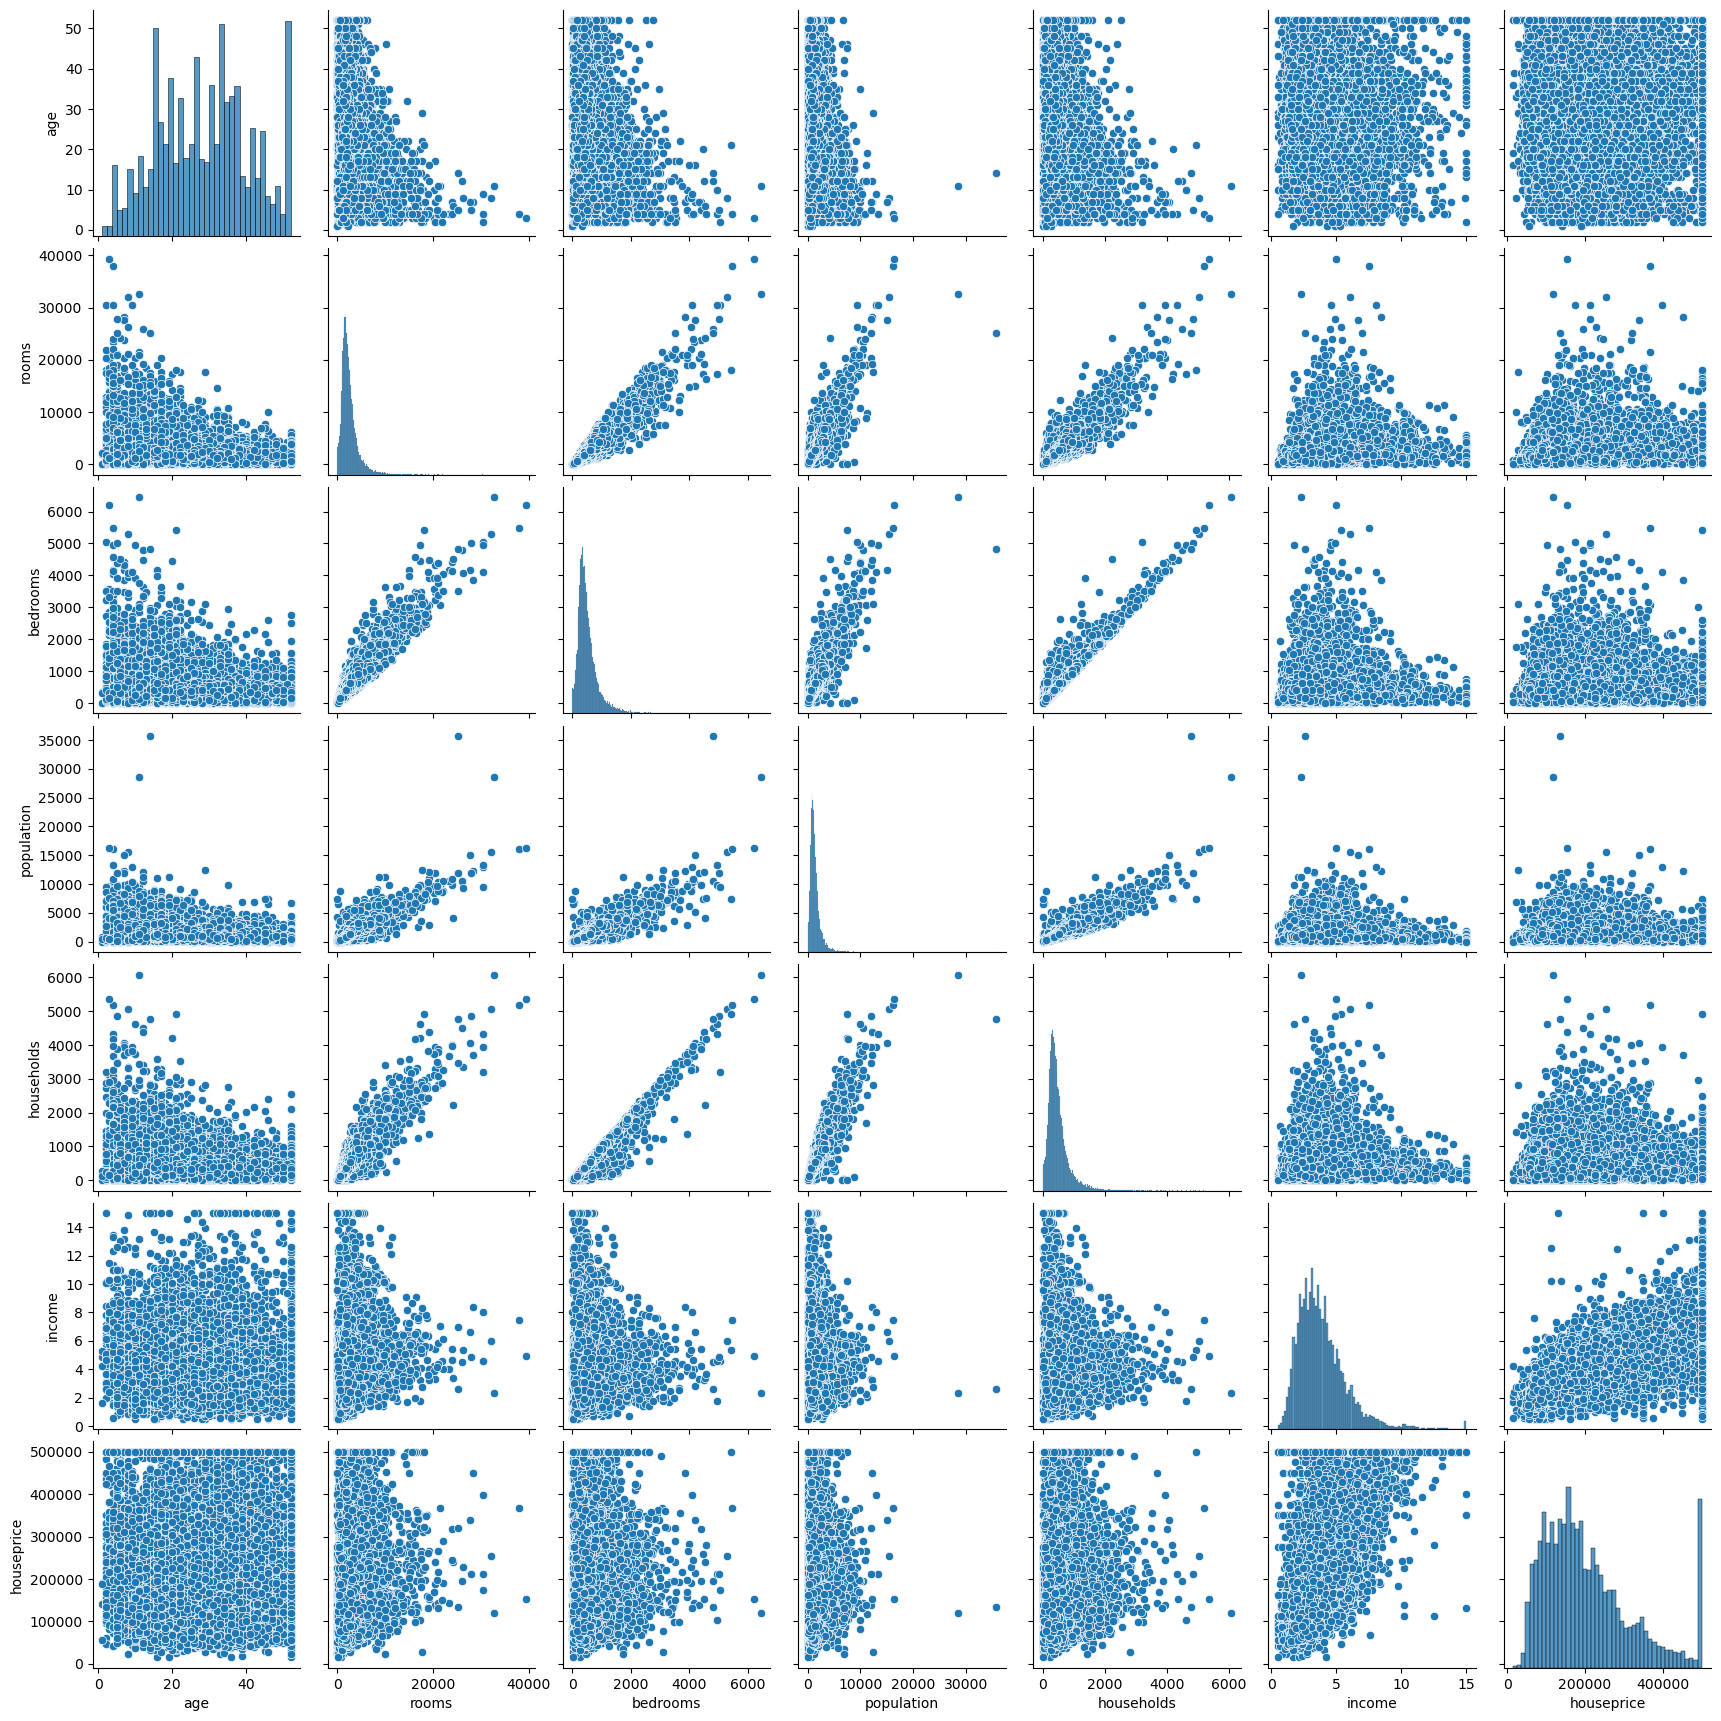

In [8]:
sns.pairplot(df1)
plt.show()

- By observing the above scatterplot of each variable, removing the rows which are not necessary and training the model with high r2 score which are necesary rows and its columns only.

In [9]:
df2=df1[(df1["rooms"]>20000)&(df1["bedrooms"]>4000)&(df1["population"]>20000)&(df1["households"]>4000)
        |(df1["houseprice"]>400000)]
df2

,age,rooms,bedrooms,population,households,income,houseprice,ocean
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
89,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
128,40.0,4991.0,674.0,1616.0,654.0,7.5544,411500.0,NEAR BAY
140,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
155,52.0,2315.0,292.0,861.0,258.0,8.8793,410300.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20428,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,<1H OCEAN
20436,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN
20438,17.0,1986.0,249.0,761.0,241.0,7.2137,401900.0,<1H OCEAN
20442,13.0,1841.0,237.0,833.0,231.0,7.7785,404700.0,<1H OCEAN


In [10]:
df1.drop(df2.index,axis=0,inplace=True)
df1.head(3)

,age,rooms,bedrooms,population,households,income,houseprice,ocean
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [11]:
df1.shape

(18705, 8)

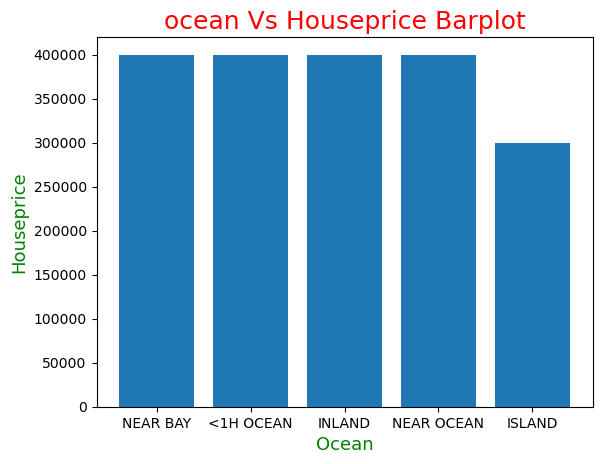

In [12]:
plt.bar(df1["ocean"],df1["houseprice"])
plt.title("ocean Vs Houseprice Barplot",color='r',fontsize=18)
plt.xlabel("Ocean",color='g',fontsize=13)
plt.ylabel("Houseprice",color='g',fontsize=13)
plt.show()

In [13]:
df1.groupby(["ocean"])[["age","rooms","bedrooms","population","income",
                        "households","houseprice"]].mean().round(2)

,age,rooms,bedrooms,population,income,households,houseprice
ocean,,,,,,,
<1H OCEAN,29.05,2571.77,547.03,1545.62,3.90,518.47,213519.12
INLAND,24.21,2726.06,536.00,1397.83,3.17,479.88,121286.18
ISLAND,40.50,1421.50,363.00,577.50,3.00,230.50,293750.00
NEAR BAY,37.16,2438.59,512.09,1247.46,3.76,485.22,218811.68
NEAR OCEAN,29.08,2507.73,542.73,1386.25,3.52,506.33,211390.32


In [14]:
df1.corr().round(2)

,age,rooms,bedrooms,population,households,income,houseprice
age,1.00,-0.38,-0.33,-0.30,-0.31,-0.21,0.04
rooms,-0.38,1.00,0.94,0.87,0.92,0.23,0.15
bedrooms,-0.33,0.94,1.00,0.89,0.98,0.03,0.09
population,-0.30,0.87,0.89,1.00,0.92,0.06,0.04
households,-0.31,0.92,0.98,0.92,1.00,0.06,0.11
income,-0.21,0.23,0.03,0.06,0.06,1.00,0.63
houseprice,0.04,0.15,0.09,0.04,0.11,0.63,1.00


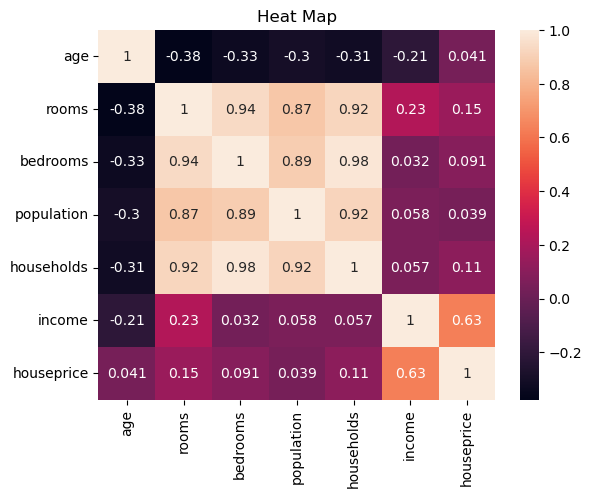

In [15]:
sns.heatmap(df1.corr(),annot=True)
plt.title("Heat Map")
plt.show()

**By observing the above heatmap, few columns such as age,rooms,bedrooms,population,households with respect to houseprice column have low very low correlation between the variables. To improving the model score have not removed those columns.**

In [16]:
X=df1.drop("houseprice",axis=1)
X=pd.get_dummies(X)
y=df1["houseprice"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.2)

In [18]:
X_train.shape

(14964, 11)

In [19]:
X_test.shape

(3741, 11)

In [20]:
y_train.shape

(14964,)

In [21]:
y_test.shape

(3741,)

# Model-1: Linear Regression:

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred_train_lr=lr.predict(X_train)
ypred_test_lr=lr.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
print("Train R2 on Linear Regression:",r2_score(y_train,ypred_train_lr))
print("Test R2 on Linear Regression:",r2_score(y_test,ypred_test_lr))
print("CV Score on Linear Regression:",cross_val_score(lr,X,y,cv=5).mean())
from sklearn.metrics import mean_squared_error
print("Test RMSE on Linear Regression:",np.sqrt(mean_squared_error(y_test,ypred_test_lr)))

Train R2 on Linear Regression: 0.5999386742224219
Test R2 on Linear Regression: 0.6122348420907076
CV Score on Linear Regression: 0.5039863915173861
Test RMSE on Linear Regression: 52238.928793651656


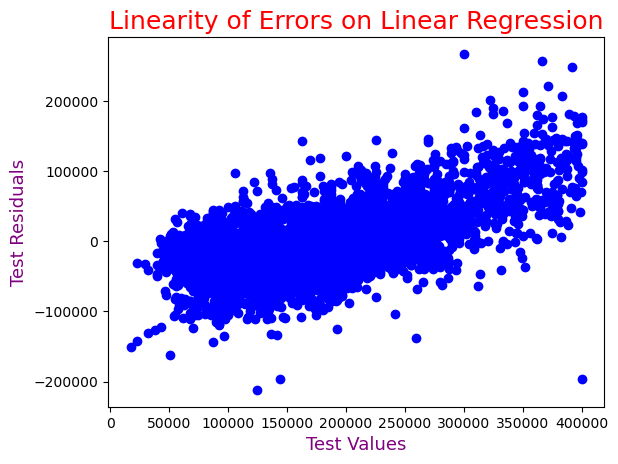

In [23]:
test_res_lr=y_test-ypred_test_lr
plt.scatter(y_test,test_res_lr,color='b')
plt.title("Linearity of Errors on Linear Regression",color='r',fontsize=18)
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

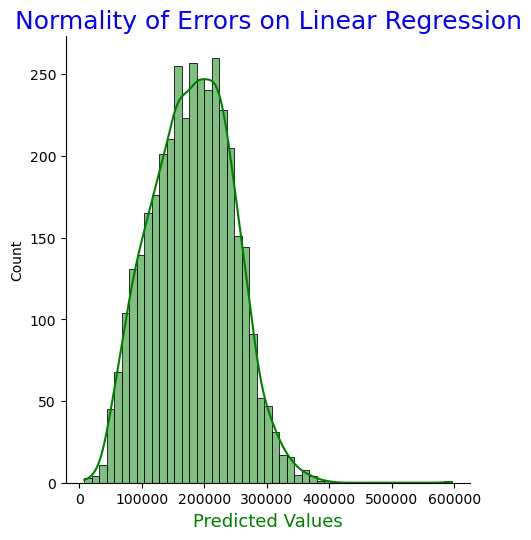

In [24]:
sns.displot(ypred_test_lr,kde=True,color='g')
plt.title("Normality of Errors on Linear Regression",color='b',fontsize=18)
plt.xlabel("Predicted Values",color='g',fontsize=13)
plt.show()

In [25]:
test_res_lr.skew()

0.7069660231438584

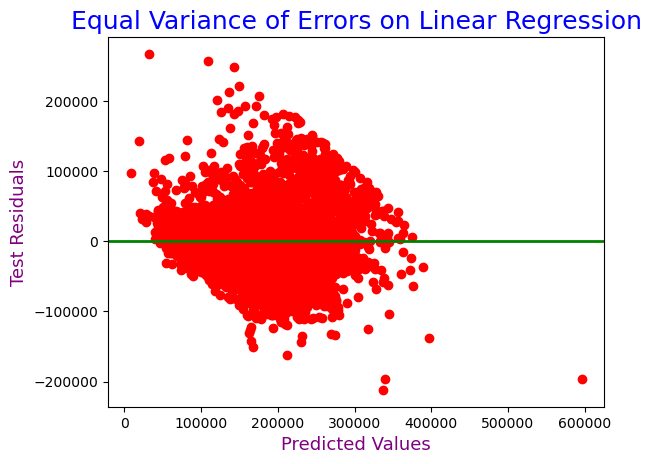

In [26]:
plt.scatter(ypred_test_lr,test_res_lr,color='r')
plt.axhline(y=0,color='g',lw=2)
plt.title("Equal Variance of Errors on Linear Regression",color='b',fontsize=18)
plt.xlabel("Predicted Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

# Model-2: Polynomial Regression:

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_conv_def=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly_def=pd.DataFrame(poly_conv_def.fit_transform(X_train))
X_test_poly_def=pd.DataFrame(poly_conv_def.transform(X_test))
nlr_def=LinearRegression()
nlr_def.fit(X_train_poly_def,y_train)
ypred_train_nlr=nlr_def.predict(X_train_poly_def)
ypred_test_nlr=nlr_def.predict(X_test_poly_def)
from sklearn.metrics import r2_score 
print("Train R2 Score for Polynomial:",r2_score(y_train,ypred_train_nlr))
print("Test R2 Score for Polynomial:",r2_score(y_test,ypred_test_nlr))
print("CV Score for Polynomial:",cross_val_score(nlr_def,X,y,cv=5).mean())
print("Test RMSE for Polynomial:",np.sqrt(mean_squared_error(y_test,ypred_test_nlr)))

Train R2 Score for Polynomial: 0.6466055209998849
Test R2 Score for Polynomial: 0.6536321930030468
CV Score for Polynomial: 0.5039863915173861
Test RMSE for Polynomial: 49371.76247140823


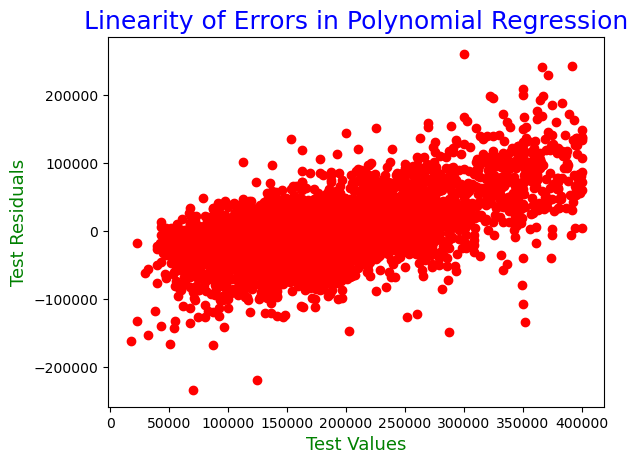

In [28]:
test_res_nlr=y_test-ypred_test_nlr
plt.scatter(y_test,test_res_nlr,color='r')
plt.title("Linearity of Errors in Polynomial Regression",color='b',fontsize=18)
plt.xlabel("Test Values",color='g',fontsize=13)
plt.ylabel("Test Residuals",color='g',fontsize=13)
plt.show()

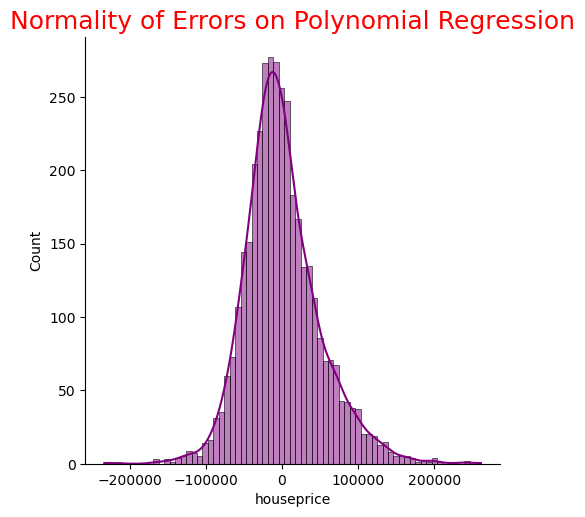

In [29]:
sns.displot(test_res_nlr,kde=True,color='purple')
plt.title("Normality of Errors on Polynomial Regression",color='r',fontsize=18)
plt.show()

In [30]:
test_res_nlr.skew()

0.6395648236645427

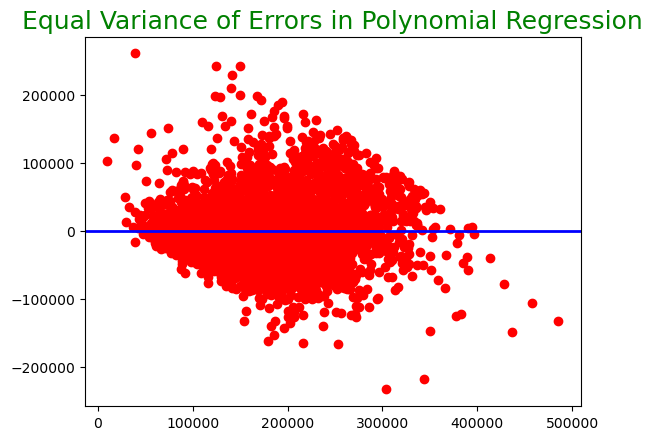

In [31]:
plt.scatter(ypred_test_nlr,test_res_nlr,color='r')
plt.axhline(y=0,color='b',lw=2)
plt.title("Equal Variance of Errors in Polynomial Regression",color='g',fontsize=18)
plt.show()

# Model-3: Lasso Regression:

In [32]:
from sklearn.linear_model import Lasso
lss=Lasso()
lss.fit(X_train,y_train)
ypred_train_lss=lss.predict(X_train)
ypred_test_lss=lss.predict(X_test)
print("Train R2 on Lasso Default:",r2_score(y_train,ypred_train_lss))
print("Test R2 on Lasso Default:",r2_score(y_test,ypred_test_lss))
print("CV Score on Lasso Default:",cross_val_score(lss,X,y,cv=5).mean())
print("Test RMSE on Lasso Default:",np.sqrt(mean_squared_error(y_test,ypred_test_lss)))

Train R2 on Lasso Default: 0.5999376359906236
Test R2 on Lasso Default: 0.6122339180570575
CV Score on Lasso Default: 0.5039963970489902
Test RMSE on Lasso Default: 52238.99103557606


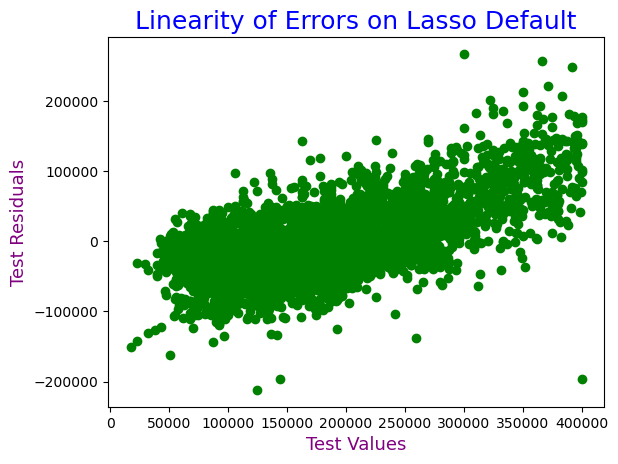

In [33]:
test_res_lss=y_test-ypred_test_lss
plt.scatter(y_test,test_res_lss,color='g')
plt.title("Linearity of Errors on Lasso Default",color='b',fontsize=18)
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

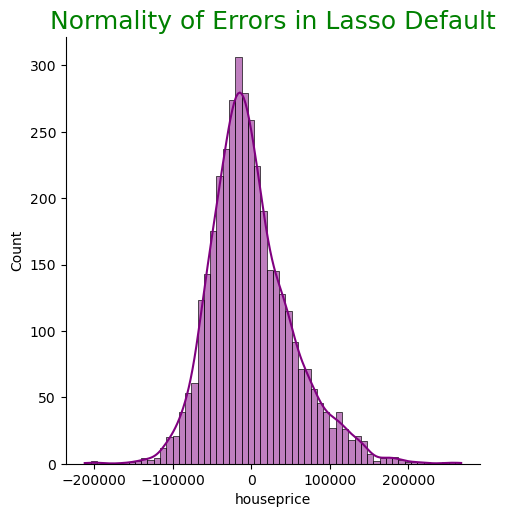

In [34]:
sns.displot(test_res_lss,kde=True,color='purple')
plt.title("Normality of Errors in Lasso Default",color='g',fontsize=18)
plt.show()

In [35]:
test_res_lss.skew()

0.7070327717522992

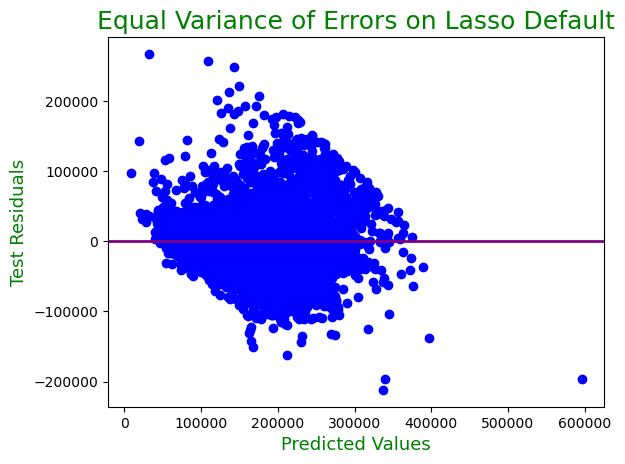

In [36]:
plt.scatter(ypred_test_lss,test_res_lss,color='b')
plt.axhline(y=0,color='purple',lw=2)
plt.title("Equal Variance of Errors on Lasso Default",color='g',fontsize=18)
plt.xlabel("Predicted Values",color='g',fontsize=13)
plt.ylabel("Test Residuals",color='g',fontsize=13)
plt.show()

# Model-4: Lasso Hyperparametertuning:

In [37]:
from sklearn.model_selection import GridSearchCV
estimator_lss=Lasso()
param_grid_lss={"alpha":[0.1,0.2,0.3,0.4,0.5]}
lss_grid=GridSearchCV(estimator_lss,param_grid_lss,cv=5,scoring='neg_mean_squared_error')
lss_grid.fit(X_train,y_train)
lss_grid.best_params_

{'alpha': 0.1}

In [38]:
lsshp=Lasso(alpha=0.1)
lsshp.fit(X_train,y_train)
ypred_train_lsshp=lsshp.predict(X_train)
ypred_test_lsshp=lsshp.predict(X_test)
print("Train R2 for Lasso Hyperparameters:",lsshp.score(X_train,y_train))
print("Test R2 for Lasso Hyperparameters:",lsshp.score(X_test,y_test))
print("CV Score for Lasso Hyperparameters:",cross_val_score(lsshp,X,y,cv=5,scoring='r2').mean())
print("Test RMSE for Lasso Hyperparameters:",np.sqrt(mean_squared_error(y_test,ypred_test_lsshp)))

Train R2 for Lasso Hyperparameters: 0.5999386638401039
Test R2 for Lasso Hyperparameters: 0.6122347501172491
CV Score for Lasso Hyperparameters: 0.5039562289227801
Test RMSE for Lasso Hyperparameters: 52238.93498888936


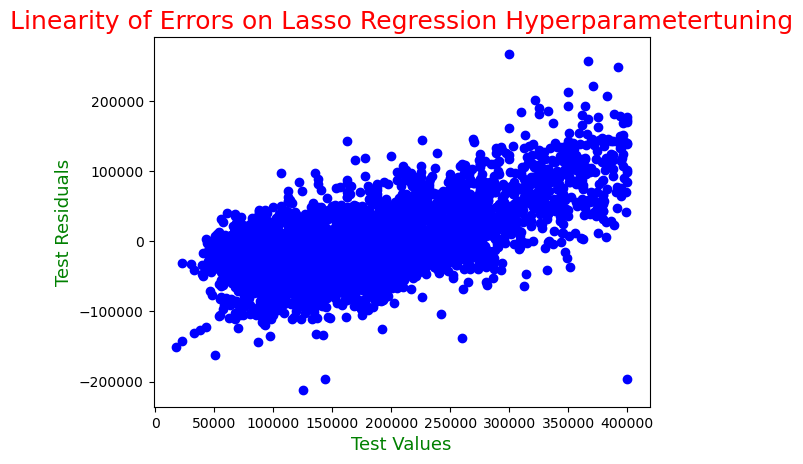

In [39]:
test_res_lsshp=(y_test)-(ypred_test_lsshp)
plt.scatter(y_test,test_res_lsshp,color='b')
plt.title("Linearity of Errors on Lasso Regression Hyperparametertuning",color='r',fontsize=18)
plt.xlabel("Test Values",color='g',fontsize=13)
plt.ylabel("Test Residuals",color='g',fontsize=13)
plt.show()

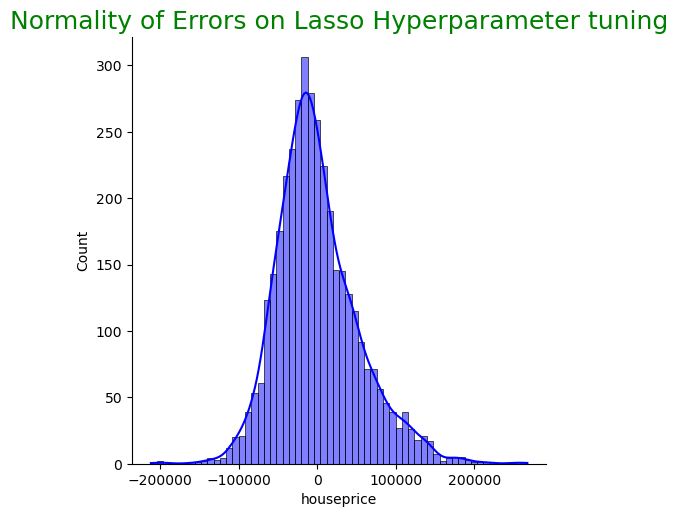

In [40]:
sns.displot(test_res_lsshp,kde=True,color='b')
plt.title("Normality of Errors on Lasso Hyperparameter tuning",color='g',fontsize=18)
plt.show()

In [41]:
test_res_lsshp.skew()

0.7069726992821538

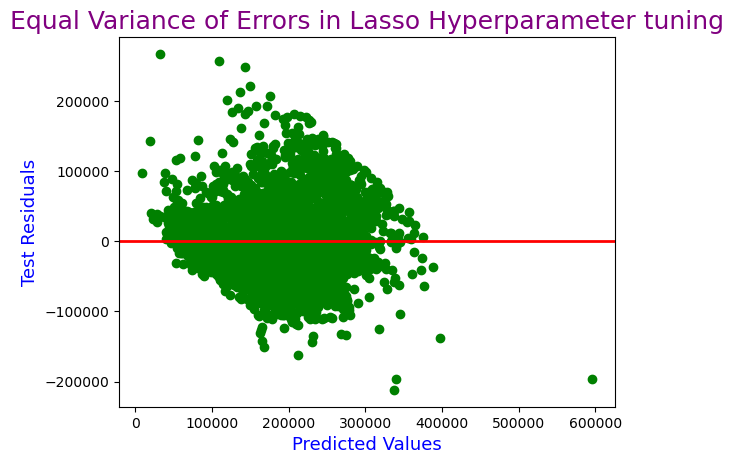

In [42]:
plt.scatter(ypred_test_lsshp,test_res_lsshp,color='g')
plt.axhline(y=0,color='r',lw=2)
plt.title("Equal Variance of Errors in Lasso Hyperparameter tuning",color='purple',fontsize=18)
plt.xlabel("Predicted Values",color='b',fontsize=13)
plt.ylabel("Test Residuals",color='b',fontsize=13)
plt.show()

# Model-5: Ridge Regression:

In [43]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(X_train,y_train)
ypred_train_rdg=rdg.predict(X_train)
ypred_test_rdg=rdg.predict(X_test)
print("Train R2 for Ridge Default:",rdg.score(X_train,y_train))
print("Test R2 for Ridge Default:",rdg.score(X_test,y_test))
print("CV Score for Ridge Default:",cross_val_score(rdg,X,y,cv=5,scoring='r2').mean())
print("Test RMSE for Ridge Default:",np.sqrt(mean_squared_error(y_test,ypred_test_rdg)))

Train R2 for Ridge Default: 0.5999190381649824
Test R2 for Ridge Default: 0.6122355170740941
CV Score for Ridge Default: 0.5040424908868134
Test RMSE for Ridge Default: 52238.88332744138


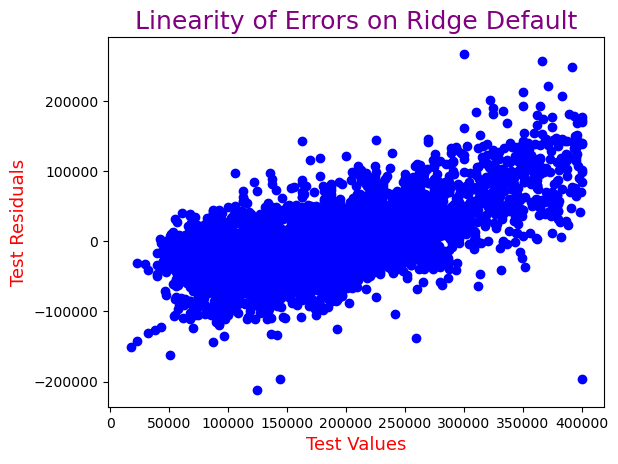

In [44]:
test_res_rdg=(y_test)-(ypred_test_rdg)
plt.scatter(y_test,test_res_rdg,color='b')
plt.title("Linearity of Errors on Ridge Default",color='purple',fontsize=18)
plt.xlabel("Test Values",color='r',fontsize=13)
plt.ylabel("Test Residuals",color='r',fontsize=13)
plt.show()

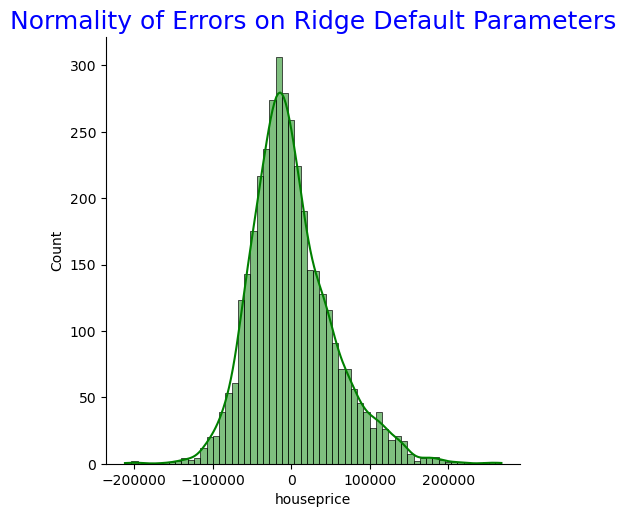

In [45]:
sns.displot(test_res_rdg,kde=True,color='g')
plt.title("Normality of Errors on Ridge Default Parameters",color='b',fontsize=18)
plt.show()

In [46]:
test_res_rdg.skew()

0.7069901461695072

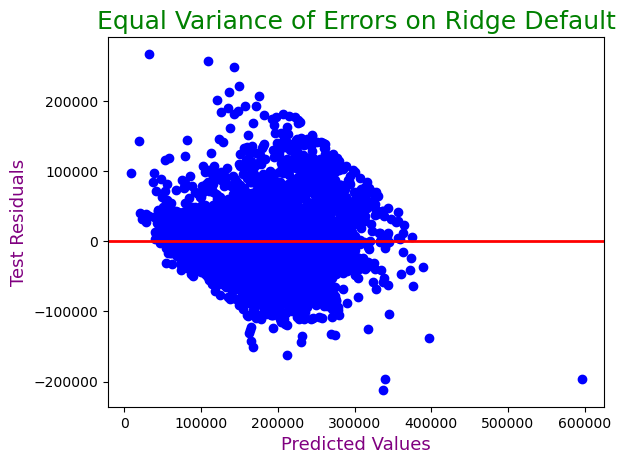

In [47]:
plt.scatter(ypred_test_rdg,test_res_rdg,color='b')
plt.axhline(y=0,color='r',lw=2)
plt.title("Equal Variance of Errors on Ridge Default",color='g',fontsize=18)
plt.xlabel("Predicted Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

# Model-7: Ridge Hyperparameter tuning:

In [48]:
estimator_rdg=Ridge()
param_grid_rdg={"alpha":[0.1,0.2,0.3,0.4,0.5]}
grid_rdg=GridSearchCV(estimator_rdg,param_grid_rdg,scoring='neg_mean_squared_error',cv=5)
grid_rdg.fit(X_train,y_train)
grid_rdg.best_params_

{'alpha': 0.1}

In [49]:
rdghp=Ridge(alpha=0.1)
rdghp.fit(X_train,y_train)
ypred_train_rdghp=rdghp.predict(X_train)
ypred_test_rdghp=rdghp.predict(X_test)
print("Train R2 for Ridge Hyperparameters:",rdghp.score(X_train,y_train))
print("Test R2 for Ridge Hyperparameters:",rdghp.score(X_test,y_test))
print("CV Score for Ridge Hyperparameters:",cross_val_score(rdghp,X,y,cv=5).mean())
print("Test RMSE for Ridge Hyperparameters:",np.sqrt(mean_squared_error(y_test,ypred_test_rdghp)))

Train R2 for Ridge Hyperparameters: 0.599938318357488
Test R2 for Ridge Hyperparameters: 0.6122349990609168
CV Score for Ridge Hyperparameters: 0.5039913057071506
Test RMSE for Ridge Hyperparameters: 52238.918220297855


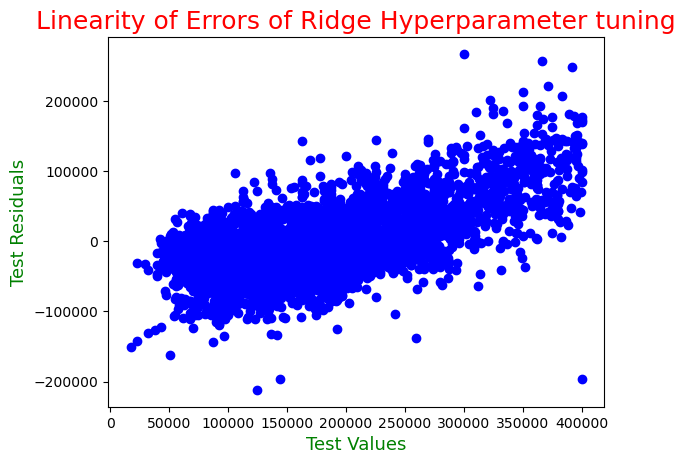

In [50]:
test_res_rdghp=(y_test)-(ypred_test_rdghp)
plt.scatter(y_test,test_res_rdghp,color='b')
plt.title("Linearity of Errors of Ridge Hyperparameter tuning",color='r',fontsize=18)
plt.xlabel("Test Values",color='g',fontsize=13)
plt.ylabel("Test Residuals",color='g',fontsize=13)
plt.show()

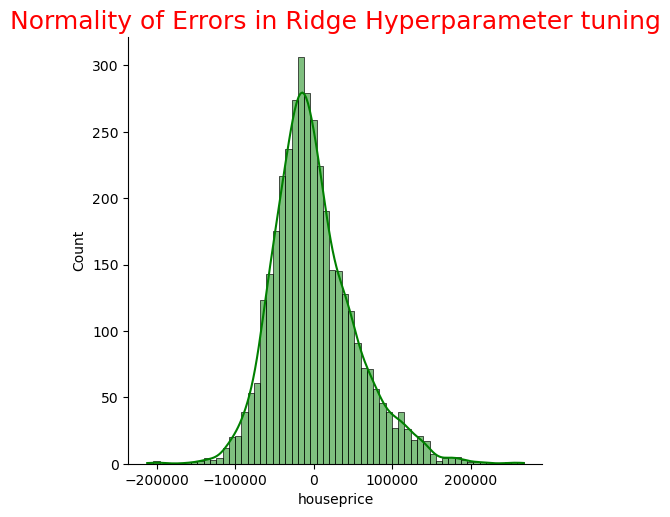

In [51]:
sns.displot(test_res_rdghp,kde=True,color='g')
plt.title("Normality of Errors in Ridge Hyperparameter tuning",color='r',fontsize=18)
plt.show()

In [52]:
test_res_rdghp.skew()

0.7069655124426988

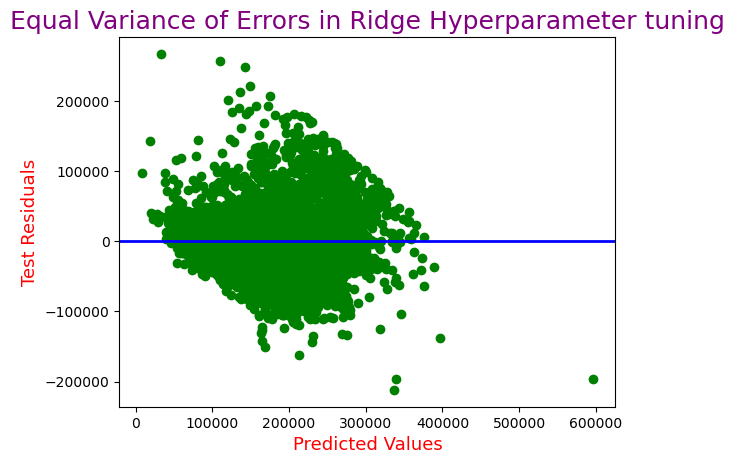

In [53]:
plt.scatter(ypred_test_rdghp,test_res_rdghp,color='g')
plt.axhline(y=0,color='b',lw=2)
plt.title("Equal Variance of Errors in Ridge Hyperparameter tuning",color='purple',fontsize=18)
plt.xlabel("Predicted Values",color='red',fontsize=13)
plt.ylabel("Test Residuals",color='red',fontsize=13)
plt.show()

# Model-8: Elastic Net Regression:

In [54]:
from sklearn.linear_model import ElasticNet
elsnet=ElasticNet()
elsnet.fit(X_train,y_train)
ypred_train_elsnet=elsnet.predict(X_train)
ypred_test_elsnet=elsnet.predict(X_test)
print("Train R2 on Elastic Net Default:",r2_score(y_train,ypred_train_elsnet))
print("Test R2 on Elastic Net Default:",r2_score(y_test,ypred_test_elsnet))
print("CV Score on Elastic Net Default:",cross_val_score(elsnet,X,y,cv=5,scoring='r2').mean())
print("Test RMSE on Elastic Net Default:",np.sqrt(mean_squared_error(y_test,ypred_test_elsnet)))

Train R2 on Elastic Net Default: 0.5405047827808855
Test R2 on Elastic Net Default: 0.5478978832673638
CV Score on Elastic Net Default: 0.4744354147544076
Test RMSE on Elastic Net Default: 56406.36861265093


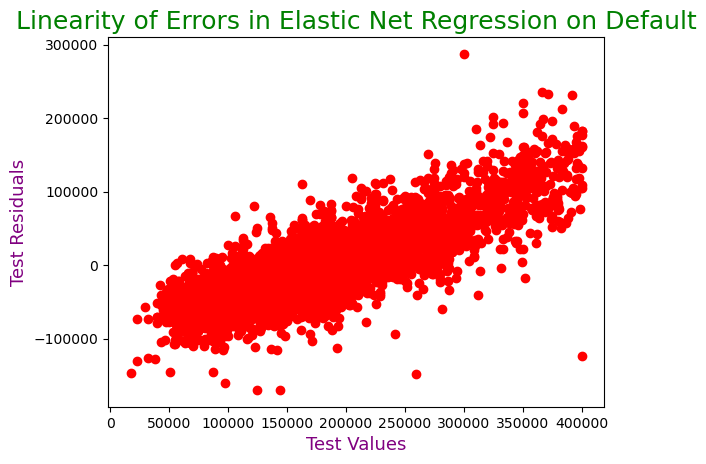

In [55]:
test_res_elsnet=(y_test)-(ypred_test_elsnet)
plt.scatter(y_test,test_res_elsnet,color='r')
plt.title("Linearity of Errors in Elastic Net Regression on Default",color='g',fontsize=18)
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

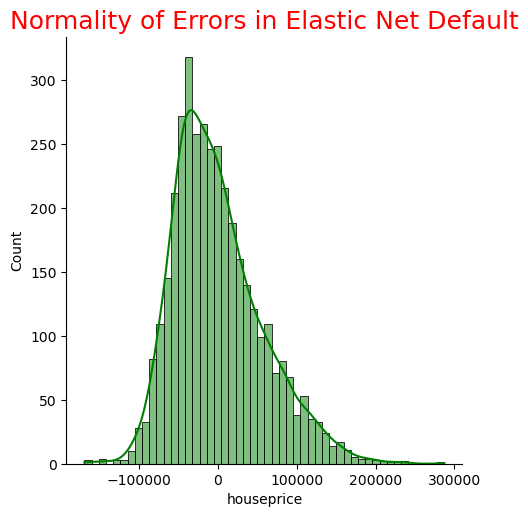

In [56]:
sns.displot(test_res_elsnet,kde=True,color='g')
plt.title("Normality of Errors in Elastic Net Default",color='r',fontsize=18)
plt.show()

In [57]:
test_res_elsnet.skew()

0.7779526405551406

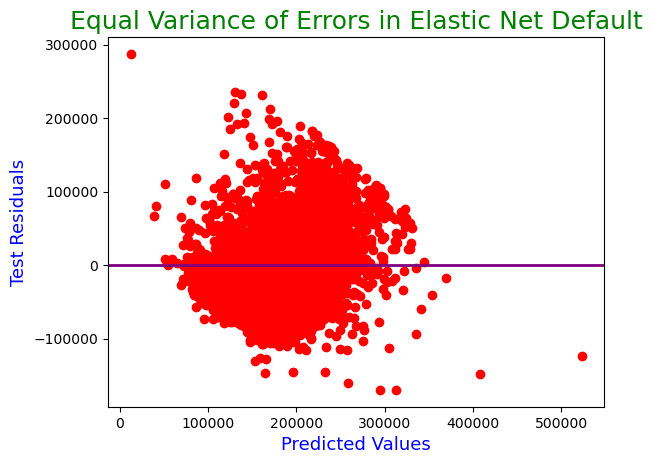

In [58]:
plt.scatter(ypred_test_elsnet,test_res_elsnet,color='r')
plt.axhline(y=0,color='purple',lw=2)
plt.title("Equal Variance of Errors in Elastic Net Default",color='g',fontsize=18)
plt.xlabel("Predicted Values",color='b',fontsize=13)
plt.ylabel("Test Residuals",color='b',fontsize=13)
plt.show()

# Model-9: Elastic Net Hyperparameter tuning:

In [59]:
estimator_elsnet=ElasticNet()
param_grid_elsnet={"alpha":[0.1,0.2,0.3],
                   "l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid_elsnet=GridSearchCV(estimator_elsnet,param_grid_elsnet,scoring='neg_mean_squared_error',cv=5)
grid_elsnet.fit(X_train,y_train)
grid_elsnet.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [60]:
elsnethp=ElasticNet(alpha=0.1,l1_ratio=1)
elsnethp.fit(X_train,y_train)
ypred_train_elsnethp=elsnethp.predict(X_train)
ypred_test_elsnethp=elsnethp.predict(X_test)
print("Train R2 on Elastic Net Hyperparameter tuning:",r2_score(y_train,ypred_train_elsnethp))
print("Test R2 on Elastic Net Hyperparameter tuning:",r2_score(y_test,ypred_test_elsnethp))
print("CV Score on Elastic Net Hyperparameter tuning:",cross_val_score(elsnethp,X,y,cv=5).mean())
print("Test RMSE on Elastic Net Hyperparameter tuning:",
      np.sqrt(mean_squared_error(y_test,ypred_test_elsnethp)))

Train R2 on Elastic Net Hyperparameter tuning: 0.5999386638401039
Test R2 on Elastic Net Hyperparameter tuning: 0.6122347501172491
CV Score on Elastic Net Hyperparameter tuning: 0.5039562289227801
Test RMSE on Elastic Net Hyperparameter tuning: 52238.93498888936


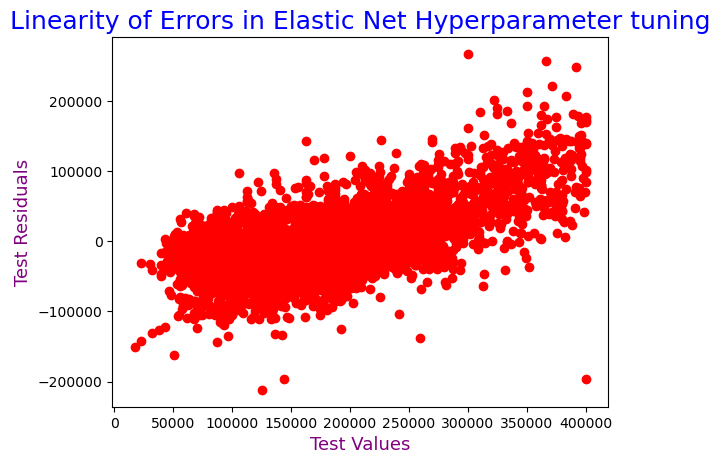

In [61]:
test_res_elsnethp=(y_test)-(ypred_test_elsnethp)
plt.scatter(y_test,test_res_elsnethp,color='r')
plt.title("Linearity of Errors in Elastic Net Hyperparameter tuning",color='b',fontsize=18)
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

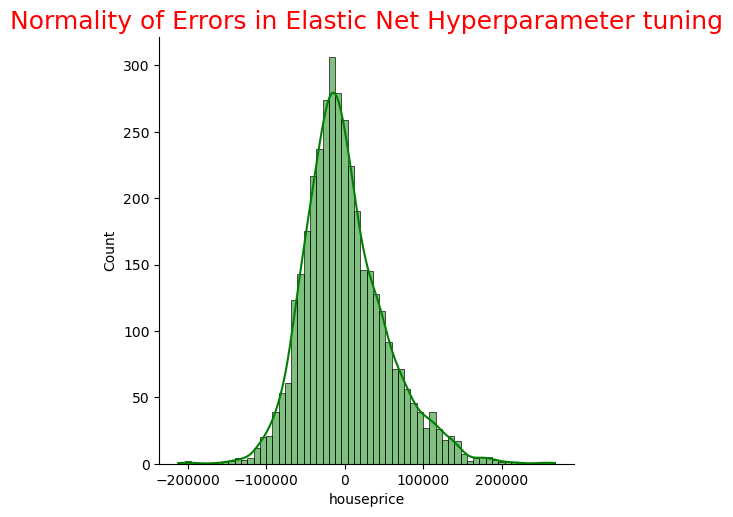

In [62]:
sns.displot(test_res_elsnethp,kde=True,color='g')
plt.title("Normality of Errors in Elastic Net Hyperparameter tuning",color='r',fontsize=18)
plt.show()

In [63]:
test_res_elsnethp.skew()

0.7069726992821538

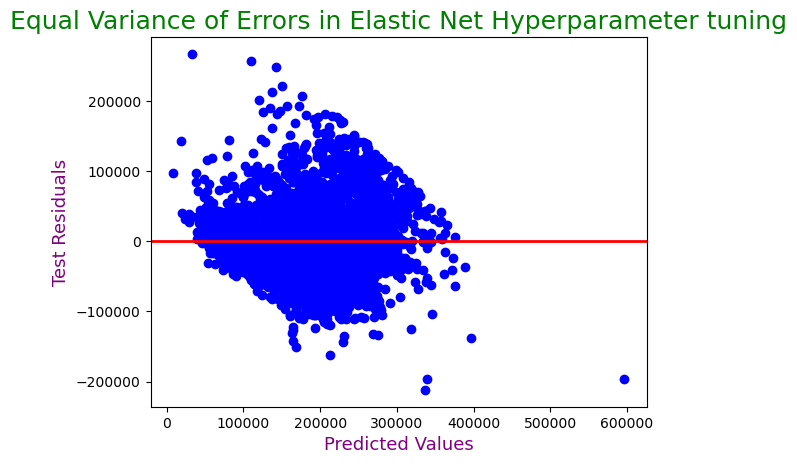

In [64]:
plt.scatter(ypred_test_elsnethp,test_res_elsnethp,color='b')
plt.axhline(y=0,color='r',lw=2)
plt.title("Equal Variance of Errors in Elastic Net Hyperparameter tuning",color='g',fontsize=18)
plt.xlabel("Predicted Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

# Model-10: Decision Tree Regression:

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
ypred_train_dtr=dtr.predict(X_train)
ypred_test_dtr=dtr.predict(X_test)
print("Train R2 on Decision Tree Regressor Default:",r2_score(y_train,ypred_train_dtr))
print("Test R2 on Decision Tree Regressor Default:",r2_score(y_test,ypred_test_dtr))
print("CV Score on Decision Tree Regressor Default:",cross_val_score(dtr,X,y,cv=5).mean())
print("Test RMSE on Decision Tree Regressor Default:",
      np.sqrt(mean_squared_error(y_test,ypred_test_dtr)))

Train R2 on Decision Tree Regressor Default: 1.0
Test R2 on Decision Tree Regressor Default: 0.31391583792052546
CV Score on Decision Tree Regressor Default: 0.16711121306878277
Test RMSE on Decision Tree Regressor Default: 69486.20094973648


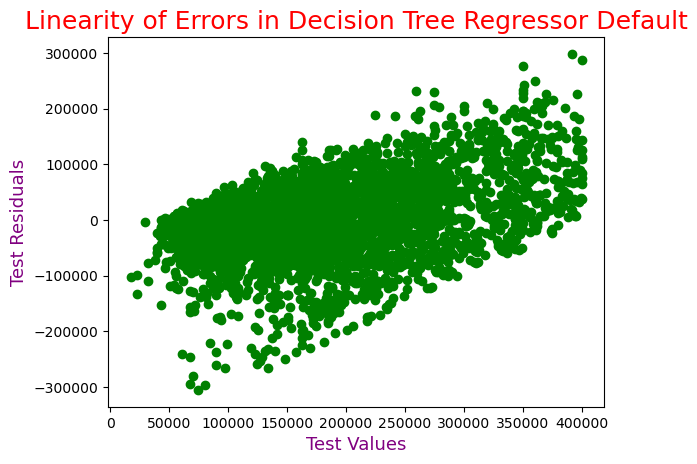

In [66]:
test_res_dtr=(y_test)-(ypred_test_dtr)
plt.scatter(y_test,test_res_dtr,color='g')
plt.title("Linearity of Errors in Decision Tree Regressor Default",fontsize=18,color='r')
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

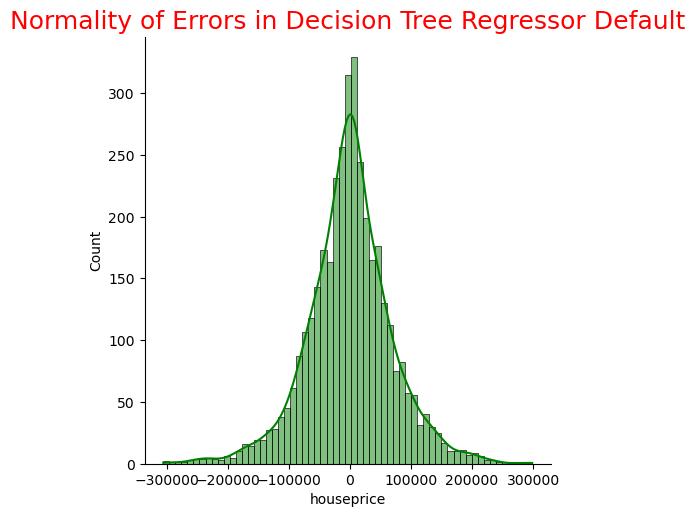

In [67]:
sns.displot(test_res_dtr,kde=True,color='g')
plt.title("Normality of Errors in Decision Tree Regressor Default",color='r',fontsize=18)
plt.show()

In [68]:
test_res_dtr.skew()

-0.09005314259277497

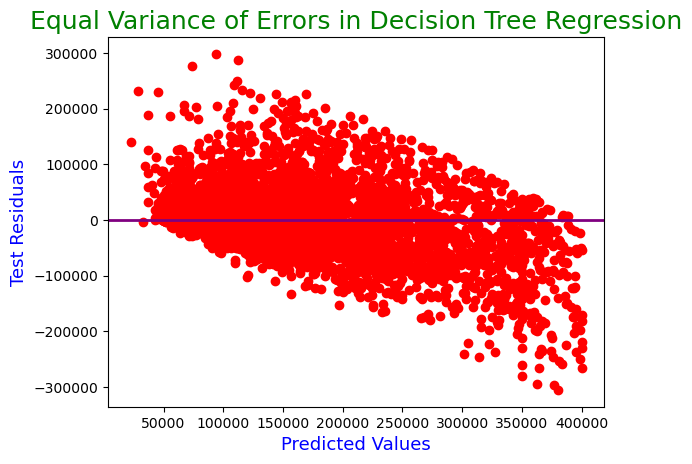

In [69]:
plt.scatter(ypred_test_dtr,test_res_dtr,color='r')
plt.axhline(y=0,color='purple',lw=2)
plt.title("Equal Variance of Errors in Decision Tree Regression",color='g',fontsize=18)
plt.xlabel("Predicted Values",color='b',fontsize=13)
plt.ylabel("Test Residuals",color='b',fontsize=13)
plt.show()

# Model-11: Decision Tree Regression Hyperparameter tuning:

In [70]:
estimator_dtr=DecisionTreeRegressor()
param_grid_dtr={'criterion':['squared_error','friedman_mse','poisson'],'max_depth':list(range(1,10)),
                'min_samples_split':list(range(1,5)),'min_samples_leaf':[1,2,3,4]}
grid_dtr=GridSearchCV(estimator_dtr,param_grid_dtr,scoring='neg_mean_squared_error',cv=5)
grid_dtr.fit(X_train,y_train)
grid_dtr.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 1}

In [71]:
dtrhp=DecisionTreeRegressor(criterion='friedman_mse',max_dept=7,min_samples_leaf=4,
                            min_samples_split=1)
dtrhp.fit(X_train,y_train)
ypred_train_dtrhp=dtrhp.predict(X_train)
ypred_test_dtrhp=dtrhp.predict(X_test)
print("Train R2 on Decision Tree Regressor Hyperparameters:",r2_score(y_train,ypred_train_dtrhp))
print("Test R2 on Decision Tree Regressor Hyperparameters:",r2_score(y_test,ypred_test_dtrhp))
print("CV Score on Decision Tree Regressor Hyperparameters:",cross_val_score(dtrhp,X,y,cv=5).mean())
print("Test RMSE on Decision Tree Regressor Hyperparameters:",
      np.sqrt(mean_squared_error(y_test,ypred_test_dtrhp)))

Train R2 on Decision Tree Regressor Hyperparameters: 0.6324957570912741
Test R2 on Decision Tree Regressor Hyperparameters: 0.5949346548623322
CV Score on Decision Tree Regressor Hyperparameters: 0.48236047276491234
Test RMSE on Decision Tree Regressor Hyperparameters: 53391.53606260067


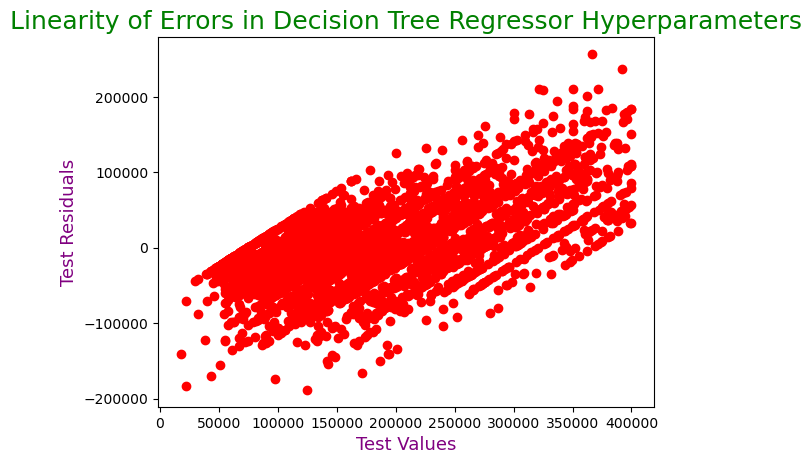

In [72]:
test_res_dtrhp=(y_test)-(ypred_test_dtrhp)
plt.scatter(y_test,test_res_dtrhp,color='r')
plt.title("Linearity of Errors in Decision Tree Regressor Hyperparameters",color='g',fontsize=18)
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

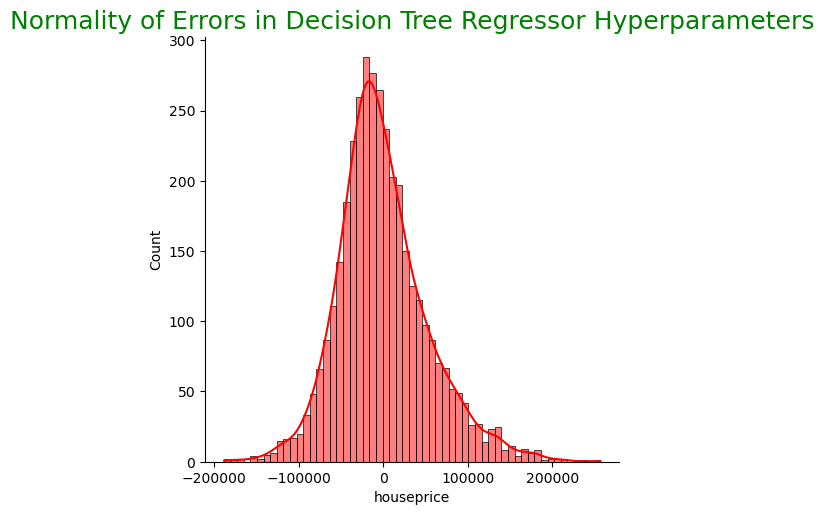

In [73]:
sns.displot(test_res_dtrhp,kde=True,color='r')
plt.title("Normality of Errors in Decision Tree Regressor Hyperparameters",color='g',fontsize=18)
plt.show()

In [74]:
test_res_dtrhp.skew()

0.6253526553231177

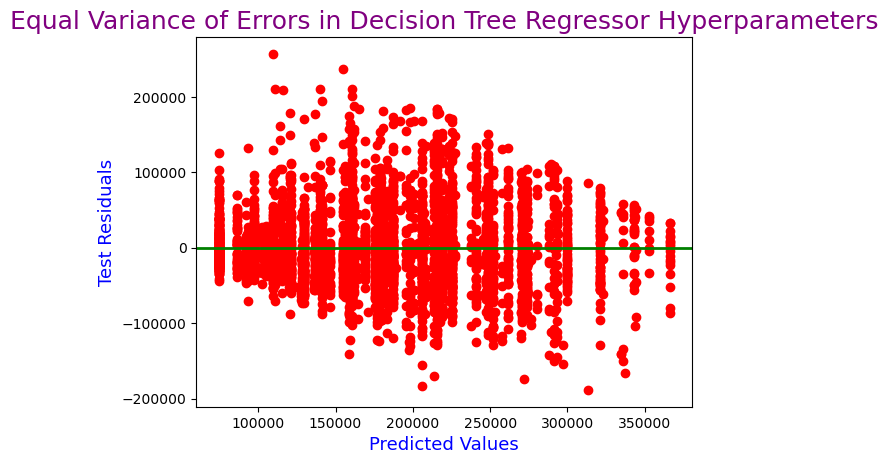

In [75]:
plt.scatter(ypred_test_dtrhp,test_res_dtrhp,color='r')
plt.axhline(y=0,color='g',lw=2)
plt.title("Equal Variance of Errors in Decision Tree Regressor Hyperparameters",
          color='purple',fontsize=18)
plt.xlabel("Predicted Values",color='b',fontsize=13)
plt.ylabel("Test Residuals",color='b',fontsize=13)
plt.show()

# Model-12: Random Forest Regression:

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
ypred_train_rfr=rfr.predict(X_train)
ypred_test_rfr=rfr.predict(X_test)
print("Train R2 on Random Forest Regressor Default:",r2_score(y_train,ypred_train_rfr))
print("Test R2 on Random Forest Regressor Default:",r2_score(y_test,ypred_test_rfr))
print("CV Score on Random Forest Regressor Default:",cross_val_score(rfr,X,y,cv=5).mean())
print("Test RMSE on Random Forest Regressor Default:",
      np.sqrt(mean_squared_error(y_test,ypred_test_rfr)))

Train R2 on Random Forest Regressor Default: 0.9523626657650027
Test R2 on Random Forest Regressor Default: 0.6625568151847105
CV Score on Random Forest Regressor Default: 0.5455284438389325
Test RMSE on Random Forest Regressor Default: 48731.54735894276


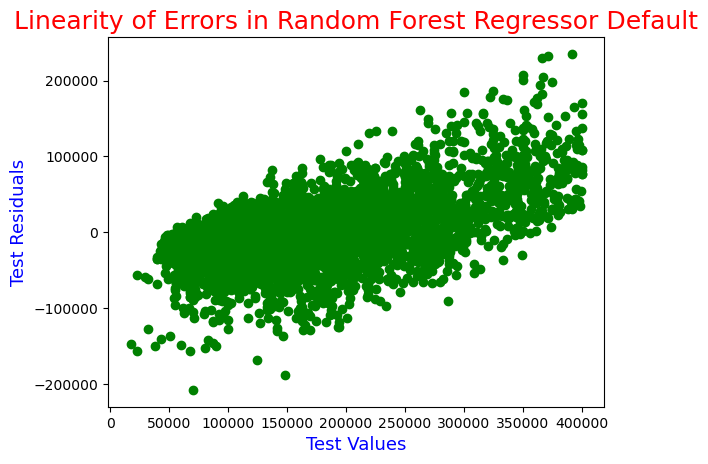

In [77]:
test_res_rfr=(y_test)-(ypred_test_rfr)
plt.scatter(y_test,test_res_rfr,color='g')
plt.title("Linearity of Errors in Random Forest Regressor Default",color='r',fontsize=18)
plt.xlabel("Test Values",color='b',fontsize=13)
plt.ylabel("Test Residuals",color='b',fontsize=13)
plt.show()

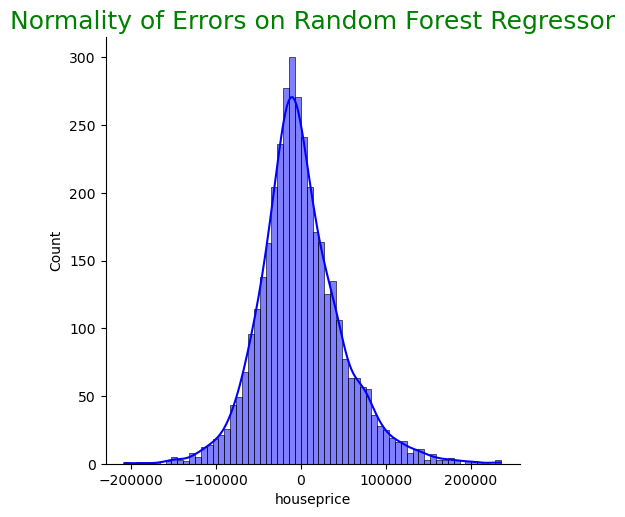

In [78]:
sns.displot(test_res_rfr,kde=True,color='b')
plt.title("Normality of Errors on Random Forest Regressor",color='g',fontsize=18)
plt.show()

In [79]:
test_res_rfr.skew()

0.5464865878633511

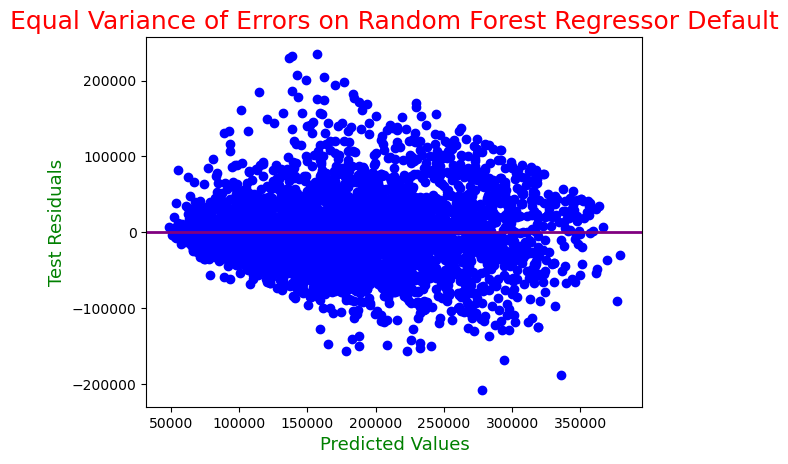

In [80]:
plt.scatter(ypred_test_rfr,test_res_rfr,color='b')
plt.axhline(y=0,color='purple',lw=2)
plt.title("Equal Variance of Errors on Random Forest Regressor Default",color='r',fontsize=18)
plt.xlabel("Predicted Values",color='g',fontsize=13)
plt.ylabel("Test Residuals",color='g',fontsize=13)
plt.show()

# Model-13: K-Nearest Neighbors Regression:

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor()
knnr.fit(X_train,y_train)
ypred_train_knnr=knnr.predict(X_train)
ypred_test_knnr=knnr.predict(X_test)
print("Train R2 on KNN Regression Default:",r2_score(y_train,ypred_train_knnr))
print("Test R2 on KNN Regression Default:",r2_score(y_test,ypred_test_knnr))
print("CV Score on KNN Regression Default:",cross_val_score(knnr,X,y,cv=5).mean())
print("Test RMSE on KNN Regression Default:",np.sqrt(mean_squared_error(y_test,ypred_test_knnr)))

Train R2 on KNN Regression Default: 0.40590448375044097
Test R2 on KNN Regression Default: 0.07611904629761379
CV Score on KNN Regression Default: -0.0494670157214999
Test RMSE on KNN Regression Default: 80633.93940626527


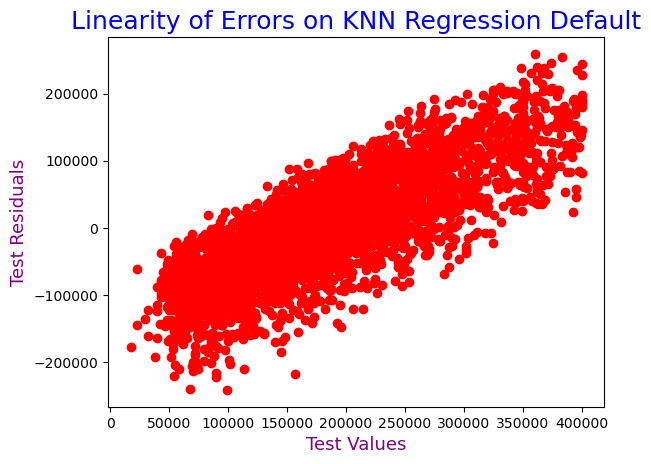

In [82]:
test_res_knnr=(y_test)-(ypred_test_knnr)
plt.scatter(y_test,test_res_knnr,color='r')
plt.title("Linearity of Errors on KNN Regression Default",color='b',fontsize=18)
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

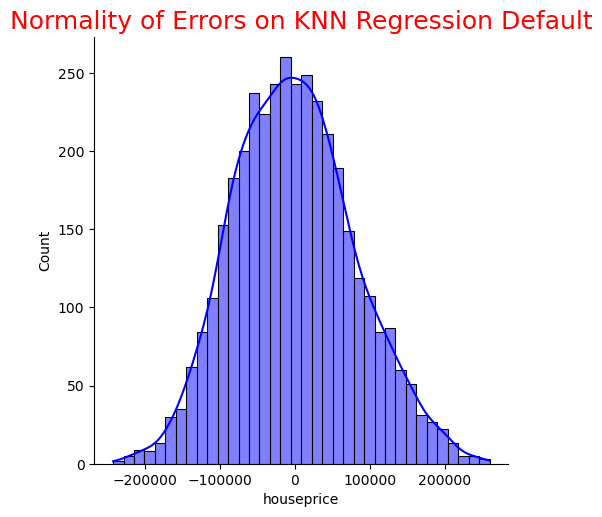

In [83]:
sns.displot(test_res_knnr,kde=True,color='b')
plt.title("Normality of Errors on KNN Regression Default",color='r',fontsize=18)
plt.show()

In [84]:
test_res_knnr.skew()

0.214142359439788

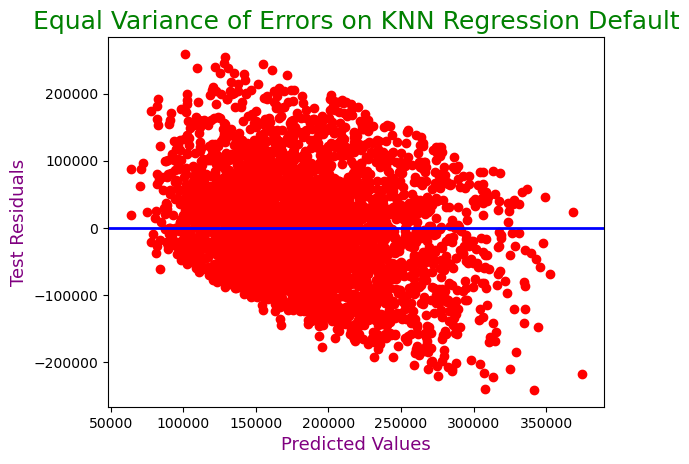

In [85]:
plt.scatter(ypred_test_knnr,test_res_knnr,color='r')
plt.axhline(y=0,color='b',lw=2)
plt.title("Equal Variance of Errors on KNN Regression Default",color='g',fontsize=18)
plt.xlabel("Predicted Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

# Model-15: K Nearest Neighbors Regression Hyperparameter tuning:

In [86]:
estimator_knnr=KNeighborsRegressor()
param_grid_knnr={"n_neighbors":list(range(1,100)),"p":[1,2]}
grid_knnr=GridSearchCV(estimator_knnr,param_grid_knnr,scoring='neg_mean_squared_error',cv=5)
grid_knnr.fit(X_train,y_train)
grid_knnr.best_params_

{'n_neighbors': 21, 'p': 1}

In [87]:
knnrhp=KNeighborsRegressor(n_neighbors=21,p=1)
knnrhp.fit(X_train,y_train)
ypred_train_knnrhp=knnrhp.predict(X_train)
ypred_test_knnrhp=knnrhp.predict(X_test)
print("Train R2 on KNN Regression Hyperparameters:",r2_score(y_train,ypred_train_knnrhp))
print("Test R2 on KNN Regression Hyperparameters:",r2_score(y_test,ypred_test_knnrhp))
print("CV Score on KNN Regression Hyperparameters:",cross_val_score(knnrhp,X,y,cv=5).mean())
print("Test RMSE on KNN Regression Hyperparameters:",
      np.sqrt(mean_squared_error(y_test,ypred_test_knnrhp)))

Train R2 on KNN Regression Hyperparameters: 0.2993723814596735
Test R2 on KNN Regression Hyperparameters: 0.1965983998979679
CV Score on KNN Regression Hyperparameters: 0.08736520060621422
Test RMSE on KNN Regression Hyperparameters: 75192.79306345544


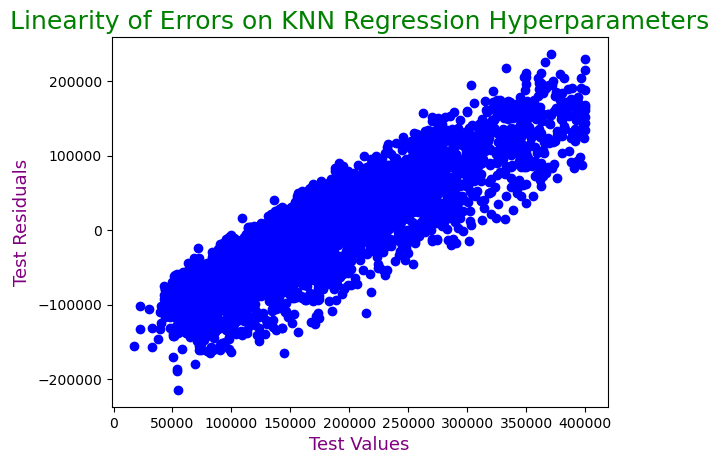

In [88]:
test_res_knnrhp=(y_test)-(ypred_test_knnrhp)
plt.scatter(y_test,test_res_knnrhp,color='b')
plt.title("Linearity of Errors on KNN Regression Hyperparameters",color='g',fontsize=18)
plt.xlabel("Test Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

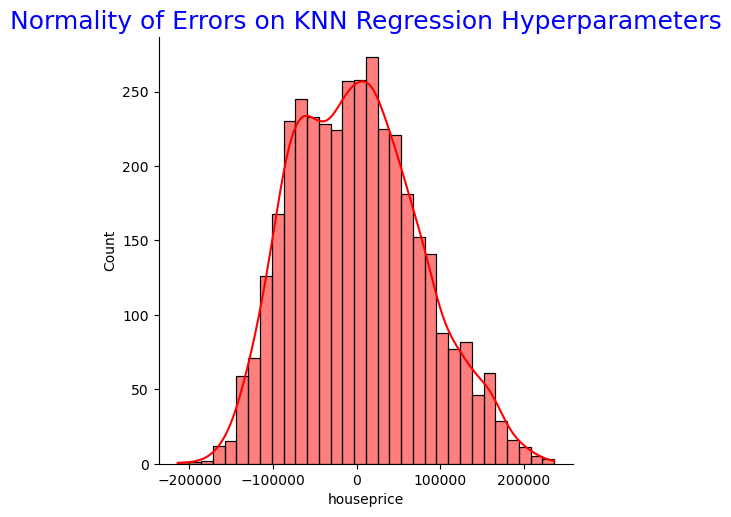

In [89]:
sns.displot(test_res_knnrhp,kde=True,color='r')
plt.title("Normality of Errors on KNN Regression Hyperparameters",color='b',fontsize=18)
plt.show()

In [90]:
test_res_knnrhp.skew()

0.3096866091459474

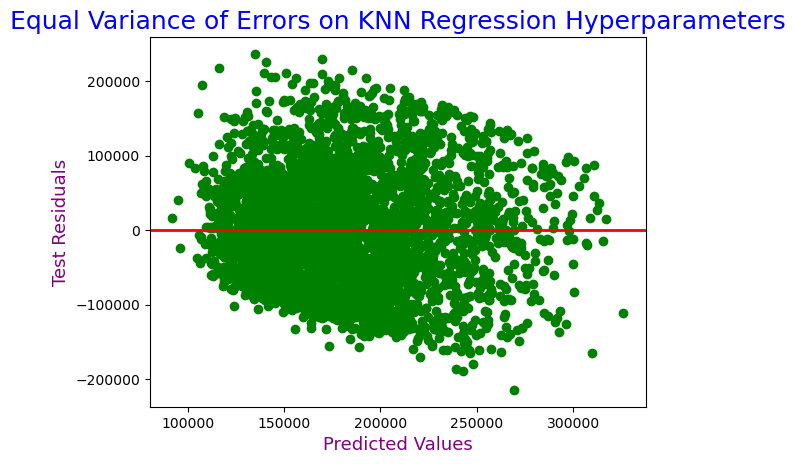

In [91]:
plt.scatter(ypred_test_knnrhp,test_res_knnrhp,color='g')
plt.axhline(y=0,color='r',linewidth=2)
plt.title("Equal Variance of Errors on KNN Regression Hyperparameters",color='b',fontsize=18)
plt.xlabel("Predicted Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

# Model-16: SVM Regression:

In [92]:
from sklearn.svm import SVR
svmr=SVR()
svmr.fit(X_train,y_train)
ypred_train_svmr=svmr.predict(X_train)
ypred_test_svmr=svmr.predict(X_test)
print("Train R2 on SVM Regression Default:",r2_score(y_train,ypred_train_svmr))
print("Test R2 on SVM Regression Default:",r2_score(y_test,ypred_test_svmr))
print("CV Score on SVM Regression Default:",cross_val_score(svmr,X,y,cv=5).mean())
print("Test RMSE on SVM Regression Default:",np.sqrt(mean_squared_error(y_test,ypred_test_svmr)))

Train R2 on SVM Regression Default: -0.024768688820459017
Test R2 on SVM Regression Default: -0.02110598753701365
CV Score on SVM Regression Default: -0.12893104705769134
Test RMSE on SVM Regression Default: 84770.60493826168


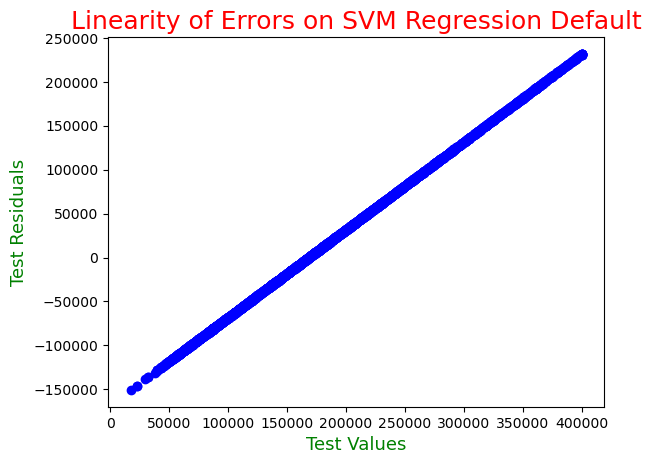

In [93]:
test_res_svmr=(y_test)-(ypred_test_svmr)
plt.scatter(y_test,test_res_svmr,color='b')
plt.title("Linearity of Errors on SVM Regression Default",color='r',fontsize=18)
plt.xlabel("Test Values",color='g',fontsize=13)
plt.ylabel("Test Residuals",color='g',fontsize=13)
plt.show()

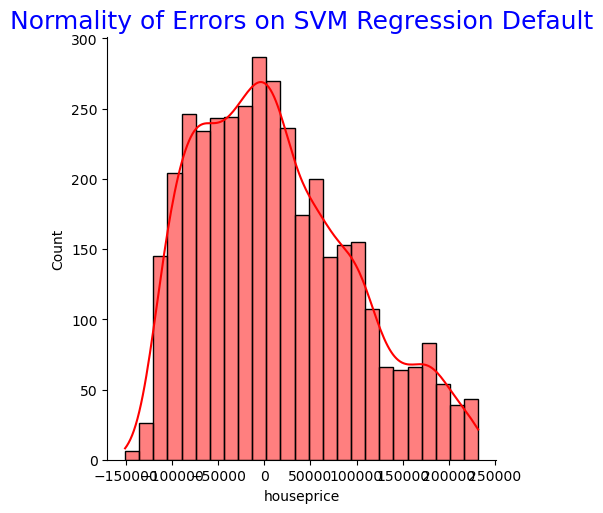

In [94]:
sns.displot(test_res_svmr,kde=True,color='r')
plt.title("Normality of Errors on SVM Regression Default",color='b',fontsize=18)
plt.show()

In [95]:
test_res_svmr.skew()

0.5381068437703521

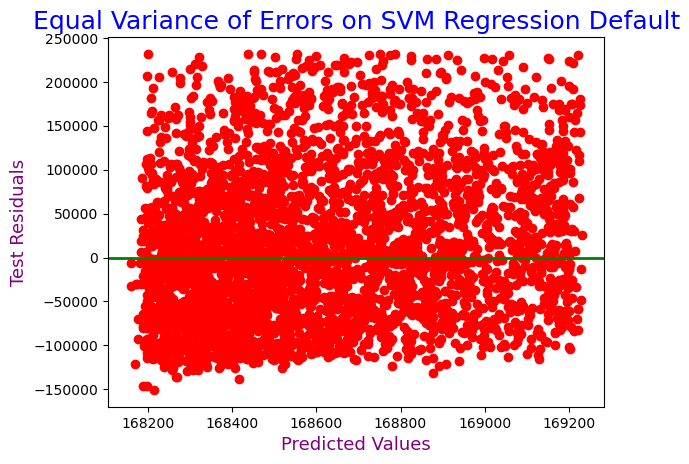

In [96]:
plt.scatter(ypred_test_svmr,test_res_svmr,color='r')
plt.axhline(y=0,color='g',lw=2)
plt.title("Equal Variance of Errors on SVM Regression Default",color='b',fontsize=18)
plt.xlabel("Predicted Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

# Model-17: ANN Regression for Neural Network Model:

In [97]:
X_train.shape

(14964, 11)

In [98]:
X_test.shape

(3741, 11)

In [99]:
from keras.models import Sequential
from keras.layers import Dense

In [100]:
ann_def=Sequential()
ann_def.add(Dense(input_dim=11,units=15,activation='relu',kernel_initializer='uniform'))
ann_def.add(Dense(units=15,activation='relu',kernel_initializer='uniform'))
ann_def.add(Dense(units=15,activation='relu',kernel_initializer='uniform'))
ann_def.add(Dense(units=15,activation='relu',kernel_initializer='uniform'))
ann_def.add(Dense(units=15,activation='relu',kernel_initializer='uniform'))
ann_def.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
ann_def.compile(optimizer='adam',loss='mean_squared_error')
ann_def.fit(X_train,y_train,batch_size=32,epochs=100)
ypred_train_anndef=ann_def.predict(X_train)
ypred_test_anndef=ann_def.predict(X_test)
print("Train R2 for ANN Regression on Neural Network:",r2_score(y_train,ypred_train_anndef))
print("Test R2 for ANN Regression on Neural Network:",r2_score(y_test,ypred_test_anndef))

Epoch 1/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 32638251008.0000
Epoch 2/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18034565120.0000
Epoch 3/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17771333632.0000
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 16655527936.0000
Epoch 5/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 16066885632.0000
Epoch 6/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12193260544.0000
Epoch 7/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7810958848.0000
Epoch 8/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7146640896.0000
Epoch 9/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7002117120.0000
Epoch 10/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6791450624.0000
Epoch 11/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6669950464.0000
Epoch 12/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6557150720.0000
Epoch 13/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 64296

**Best Model among all, Polynomial Regression with high test Score and least RMSE value.**

# Polynomial Regression is best model:

In [101]:
from sklearn.preprocessing import PolynomialFeatures
poly_conv_def=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly_def=pd.DataFrame(poly_conv_def.fit_transform(X_train))
X_test_poly_def=pd.DataFrame(poly_conv_def.transform(X_test))
nlr_def=LinearRegression()
nlr_def.fit(X_train_poly_def,y_train)
ypred_train_nlr=nlr_def.predict(X_train_poly_def)
ypred_test_nlr=nlr_def.predict(X_test_poly_def)
print("Train R2 Score for Polynomial:",r2_score(y_train,ypred_train_nlr))
print("Test R2 Score for Polynomial:",r2_score(y_test,ypred_test_nlr))
print("CV Score for Polynomial:",cross_val_score(nlr_def,X,y,cv=5).mean())
print("Test RMSE for Polynomial:",np.sqrt(mean_squared_error(y_test,ypred_test_nlr)))

Train R2 Score for Polynomial: 0.6466055209998849
Test R2 Score for Polynomial: 0.6536321930030468
CV Score for Polynomial: 0.5039863915173861
Test RMSE for Polynomial: 49371.76247140823


**Assumptions of Polynomial Regression:**

**1) Linearity of Errors:**

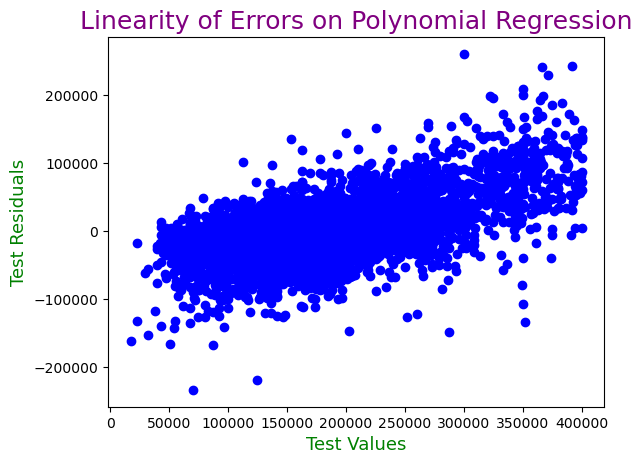

In [102]:
test_res_nlr=y_test-ypred_test_nlr
plt.scatter(y_test,test_res_nlr,color='b')
plt.title("Linearity of Errors on Polynomial Regression",color='purple',fontsize=18)
plt.xlabel("Test Values",color='g',fontsize=13)
plt.ylabel("Test Residuals",color='g',fontsize=13)
plt.show()

- Having linearity of errors.

**2) Normality of Errors on Polynomial Regression:**

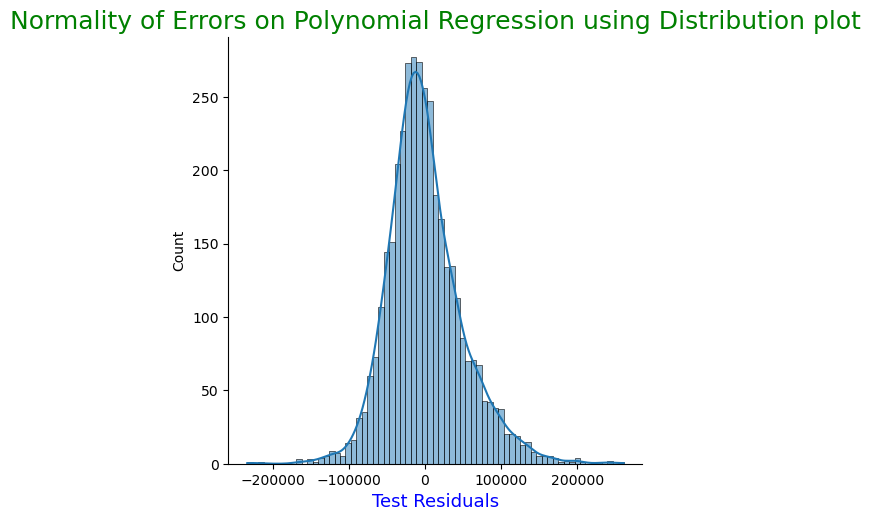

In [103]:
sns.displot(test_res_nlr,kde=True)
plt.title("Normality of Errors on Polynomial Regression using Distribution plot",
          color='g',fontsize=18)
plt.xlabel("Test Residuals",color='b',fontsize=13)
plt.show()

In [104]:
test_res_nlr.skew()

0.6395648236645427

- Skewness of Test Residuals is in normal.

**3) Equal Variance of Errors on Polynomial Regression:**

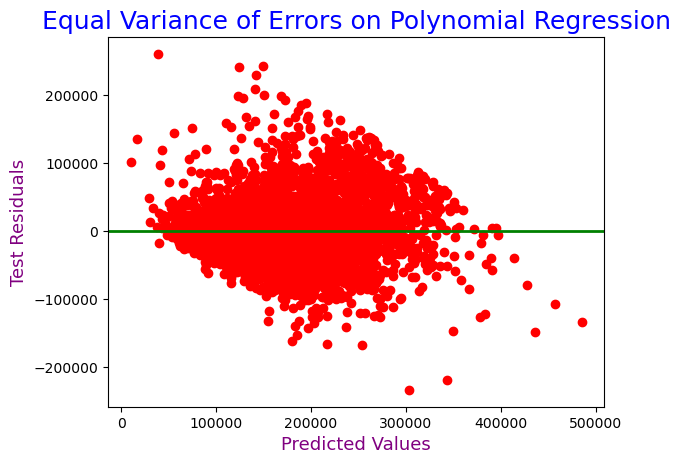

In [105]:
plt.scatter(ypred_test_nlr,test_res_nlr,color='r')
plt.axhline(y=0,color='g',lw=2)
plt.title("Equal Variance of Errors on Polynomial Regression",color='b',fontsize=18)
plt.xlabel("Predicted Values",color='purple',fontsize=13)
plt.ylabel("Test Residuals",color='purple',fontsize=13)
plt.show()

- Having equal variance of errors

**all assumptions are satisfied.**